In [1]:
'''
the perceptron
'''

'\nthe perceptron\n'

In [4]:
'''
needs:

input features:
    for purposes of this demo, only need features in two dimensions: x1 and x2


output:
    a linear classifier define by w (the weights on each feature) and b, a bias

'''

'\nneeds:\n\ninput features:\n    for purposes of this demo, only need features in two dimensions: x1 and x2\n\n\noutput:\n'

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_data(n_samples=200, x_range=(0, 10), y_range=(0, 10),
                                     line_params=(1, 5), random_state=None):
    """
    Generate a 2D linearly separable dataset for binary classification.

    Parameters:
        n_samples (int): Total number of data points.
        x_range (tuple): Range (min, max) for the x-coordinate.
        y_range (tuple): Range (min, max) for the y-coordinate.
        line_params (tuple): (slope, intercept) of the linear decision boundary.
                             Points with y > slope * x + intercept are labeled 1; otherwise 0.
        random_state (int, optional): Seed for reproducibility.

    Returns:
        X (np.ndarray): Array of shape (n_samples, 2) containing the feature vectors.
        y (np.ndarray): Array of shape (n_samples,) containing binary labels (0 or 1).
    """
    rng = np.random.default_rng(random_state)
    X = rng.uniform(low=[x_range[0], y_range[0]], high=[x_range[1], y_range[1]], size=(n_samples, 2))
    slope, intercept = line_params
    y = (X[:, 1] > slope * X[:, 0] + intercept).astype(int)
    return X, y

def plot_data(X, y, line_params, x_range, y_range):
    """
    Plot the generated data along with its decision boundary.

    Parameters:
        X (np.ndarray): Data points of shape (n_samples, 2).
        y (np.ndarray): Labels of shape (n_samples,).
        line_params (tuple): (slope, intercept) of the linear decision boundary.
        x_range (tuple): x-axis limits for the plot.
        y_range (tuple): y-axis limits for the plot.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the two classes
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', edgecolor='k')
    
    # Plot the decision boundary: y = slope * x + intercept
    slope, intercept = line_params
    x_vals = np.linspace(x_range[0], x_range[1], 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Linearly Separable Data for Binary Classification')
    plt.legend()
    plt.grid(True)
    plt.show()


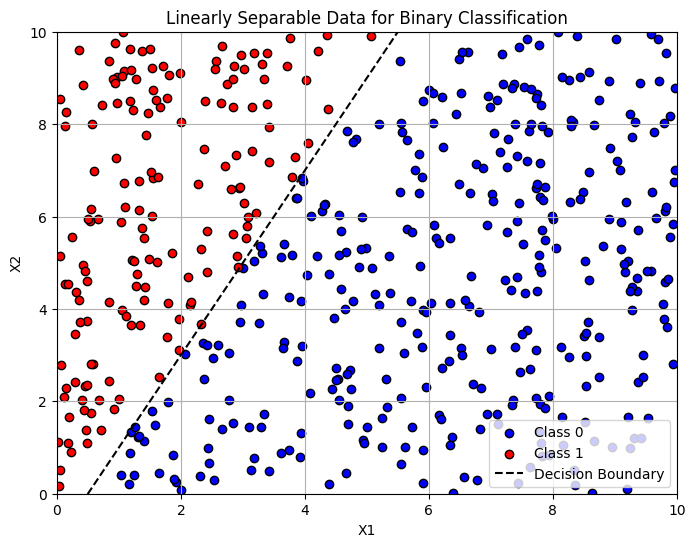

In [73]:
# Parameters for the dataset
n_samples = 500
x_range = (0, 10)
y_range = (0, 10)
line_params = (2, -1)  # For the line: y = 2x -1
random_state = 42

# Generate the data
X, y = generate_linearly_separable_data(n_samples, x_range, y_range, line_params, random_state)

# Visualize the data and the decision boundary
plot_data(X, y, line_params, x_range, y_range)

In [74]:
#change all labels from 0,1 to 1,-1
y=2*(y-0.5)

In [75]:
y

array([-1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [76]:
sample_num, dimension = X.shape

In [77]:
sample_num

500

In [78]:
X_ext = np.hstack( ( X, np.ones((sample_num,1))) )

In [79]:
X_ext.shape

(500, 3)

In [80]:
def perceptron(data, true_labels):
    '''
    inputs:
    

    y in set {-1,+1}
    
    '''

    sample_num, dimension = data.shape

    X = np.hstack( ( data, np.ones((sample_num,1))) )

    W = np.zeros( ( 1, dimension+1 ) )
    total_updates = 0
    updates = float('-inf')

    while updates != 0:
        updates = 0
        
        for index in range(sample_num):
            sample = X[index, :].reshape(1, -1)  # Force sample to remain a row vector
            prediction = np.dot(W, sample.T)  # Dot product: (1, d+1) x (d+1, 1) -> (1,1)

            if true_labels[index] * prediction <= 0:
                W = W + true_labels[index] * sample  # Weight update
                updates += 1

        total_updates = total_updates+updates
        print("classifier is ", W)

    return W, total_updates

classifier is  [[-20.08808137  14.74879809   3.        ]]
classifier is  [[-29.27234924  21.52198223   6.        ]]
classifier is  [[-35.36758922  22.29074259   8.        ]]
classifier is  [[-37.42798738  25.41516514   9.        ]]
classifier is  [[-42.10880451  25.98321582  10.        ]]
classifier is  [[-44.16920266  29.10763837  11.        ]]
classifier is  [[-46.20280897  29.54359973  13.        ]]
classifier is  [[-47.69974601  28.29236413  14.        ]]
classifier is  [[-47.58557077  30.47627283  15.        ]]
classifier is  [[-50.31804674  31.60185214  16.        ]]
classifier is  [[-51.81498378  30.35061654  17.        ]]
classifier is  [[-51.85486081  31.60857619  18.        ]]
classifier is  [[-53.35179786  30.35734059  19.        ]]
classifier is  [[-53.23762262  32.54124929  20.        ]]
classifier is  [[-54.73455967  31.2900137   21.        ]]
classifier is  [[-54.7744367   32.54797335  22.        ]]
classifier is  [[-56.27137374  31.29673775  23.        ]]
classifier is 

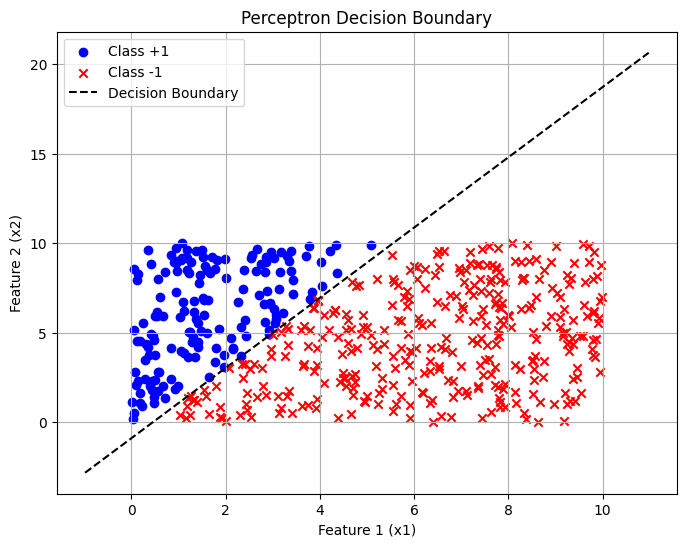

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def plot_perceptron(X, y, W):
    """
    Plots the decision boundary learned by the perceptron along with data points.

    X: Feature matrix (samples, features).
    y: True labels (-1 or +1).
    W: Learned weight vector (1, dimension + 1).
    """

    # Extract features
    x1 = X[:, 0]  # First feature
    x2 = X[:, 1]  # Second feature

    # Extract weights
    W1, W2 = W[0, :-1]  # First two weights
    b = W[0, -1]  # Bias term
    print("bias is ", b)

    # Generate x values for the decision boundary
    x_vals = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    y_vals = - (W1 / W2) * x_vals - (b / W2)  # Solve for x2

    # Plot data points
    plt.figure(figsize=(8, 6))
    plt.scatter(x1[y == 1], x2[y == 1], marker='o', color='blue', label='Class +1')
    plt.scatter(x1[y == -1], x2[y == -1], marker='x', color='red', label='Class -1')

    # Plot decision boundary
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

    # Labels and legend
    plt.xlabel("Feature 1 (x1)")
    plt.ylabel("Feature 2 (x2)")
    plt.title("Perceptron Decision Boundary")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Example usage
linear_classifier, total_updates = perceptron(X, y)
plot_perceptron(X, y, linear_classifier)


In [82]:
total_updates

225